###  Malaria Detection        

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [6]:
pwd

'C:\\Users\\Besitzer\\Desktop\\Machine Learning\\practise\\CNN'

In [11]:
my_data_dir = 'C:\\Users\\Besitzer\\Desktop\\Machine Learning\\practise\\CNN\\cell_images'

In [12]:
os.listdir(my_data_dir)

['test', 'train']

In [13]:
test_path = my_data_dir+'\\test\\'
train_path= my_data_dir+'\\train\\'

In [14]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [15]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [18]:
para_cell = train_path+'\\parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [19]:
para_img = imread(para_cell)

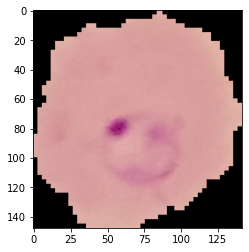

In [20]:
plt.imshow(para_img)

In [21]:
para_img.shape

(148, 142, 3)

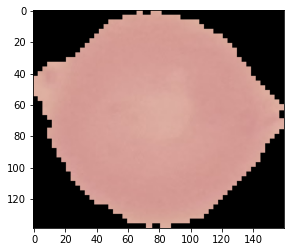

In [25]:
uninfected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell)

In [26]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [27]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [28]:
uninfected_cell.shape

(139, 160, 3)

In [29]:
para_img.shape

(148, 142, 3)

In [32]:
#to check the average dimensions of the image

dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'\\uninfected'):
    
    img = imread(train_path+'\\uninfected\\'+image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

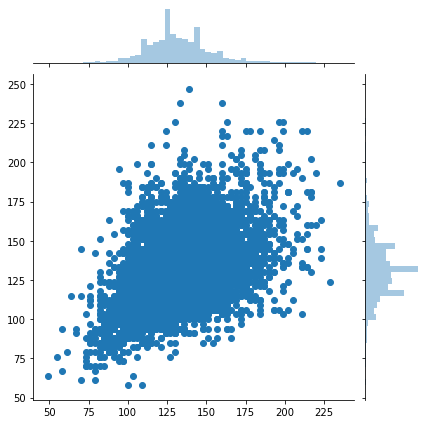

In [33]:
sns.jointplot(dim1,dim2)

In [34]:
np.mean(dim1)

131.64820899110507

In [35]:
np.mean(dim2)

131.4041990544114

In [36]:
image_shape = (130,130,3)

### Preparing the Data 

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.10,
                               zoom_range=0.10,
                               horizontal_flip=True,
                               fill_mode='nearest')

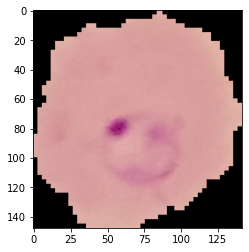

In [39]:
plt.imshow(para_img)

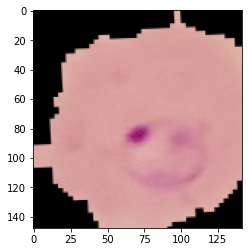

In [42]:
plt.imshow(image_gen.random_transform(para_img))

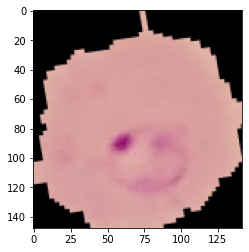

In [43]:
plt.imshow(image_gen.random_transform(para_img))

In [44]:
train_path

'C:\\Users\\Besitzer\\Desktop\\Machine Learning\\practise\\CNN\\cell_images\\train\\'

In [45]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [46]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


### Creating the Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, Activation

In [105]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)      

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [109]:
batch_size = 16

In [110]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [111]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,
                                               class_mode='binary')

Found 2600 images belonging to 2 classes.


In [112]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
results = model.fit_generator(train_image_gen,epochs=5,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/5
1560/1560 [==============================] - 770s 494ms/step - loss: 0.3079 - accuracy: 0.8763 - val_loss: 0.1823 - val_accuracy: 0.9450
Epoch 2/5
1560/1560 [==============================] - 760s 487ms/step - loss: 0.1692 - accuracy: 0.9465 - val_loss: 0.1815 - val_accuracy: 0.9423
Epoch 3/5
1560/1560 [==============================] - 833s 534ms/step - loss: 0.1654 - accuracy: 0.9490 - val_loss: 0.1634 - val_accuracy: 0.9485
Epoch 4/5
1560/1560 [==============================] - 637s 408ms/step - loss: 0.1581 - accuracy: 0.9492 - val_loss: 0.1479 - val_accuracy: 0.9527
Epoch 5/5
1560/1560 [==============================] - 2614s 2s/step - loss: 0.1519 - accuracy: 0.9512 - val_loss: 0.1514 - val_accuracy: 0.9508


In [89]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [115]:
losses = pd.DataFrame(model.history.history)

In [116]:
losses.head(2)

,loss,accuracy,val_loss,val_accuracy
0,0.307902,0.876272,0.182258,0.945000
1,0.169226,0.946510,0.181509,0.942308


<AxesSubplot:>

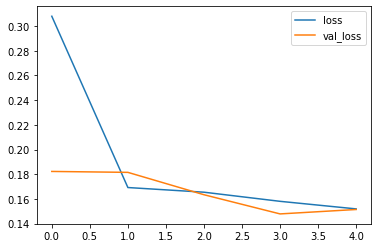

In [117]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

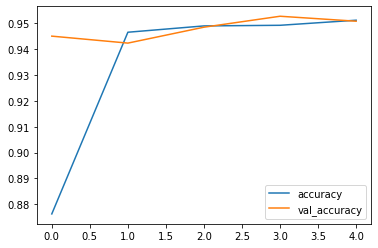

In [118]:
losses[['accuracy','val_accuracy']].plot()

In [119]:
model.evaluate_generator(test_image_gen)

[0.14322669804096222, 0.9553846120834351]

In [120]:
from tensorflow.keras.preprocessing import image

In [121]:
pred_prob = model.predict_generator(test_image_gen)

In [122]:
pred_prob

array([[9.8175895e-01],
       [8.1925064e-02],
       [4.8026741e-03],
       ...,
       [9.7085285e-01],
       [1.1442399e-01],
       [5.8722496e-04]], dtype=float32)

In [123]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [124]:
predictions = pred_prob > 0.5

In [125]:
predictions

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1300
           1       0.51      0.52      0.51      1300

    accuracy                           0.51      2600
   macro avg       0.51      0.51      0.51      2600
weighted avg       0.51      0.51      0.51      2600



In [128]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[646 654]
 [630 670]]
